# Seaborn

Seaborn is a library for creating basic data visualization. It provides an easy to understand interface for some of the most common graph types.

```{seealso}
The [Seaborn tutorial](https://seaborn.pydata.org/tutorial/introduction.html) has lots of detailed information about all the things you can do with the library.
```

To begin, you'll need to import both `pandas` and `seaborn`. For consistency, you can import the same `mpg` dataset that we used in the previous chapter. You'll also want to use Seaborn's `set_theme()` function. Even if you don't specify a theme, the default theme makes things look much nicer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

mpg = pd.read_csv("data/mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Seaborn code follows a relatively simple formula. You choose variable names (surrounded by quotes) to map to the x- and y-axis of your graph, and you can also map variables to things like `hue` (for color) and `col` (for columns). You also set the `data` parameter to refer to the DataFrame you're working with.

To get different kinds of visualizations, you choose from several different Seaborn functions, and you also set the `kind` parameter to change the kind of graph within those function groupings. In this tutorial you'll learn some basic examples.

## Distribution Plots

The `displot()` function shows distributions. Distribution plots with just one variable are histograms.

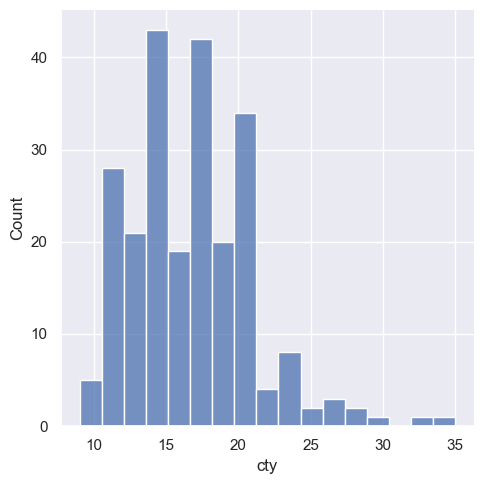

In [2]:
sns.displot(x="cty",data=mpg)

Change the `kind` parameter to make density plots.

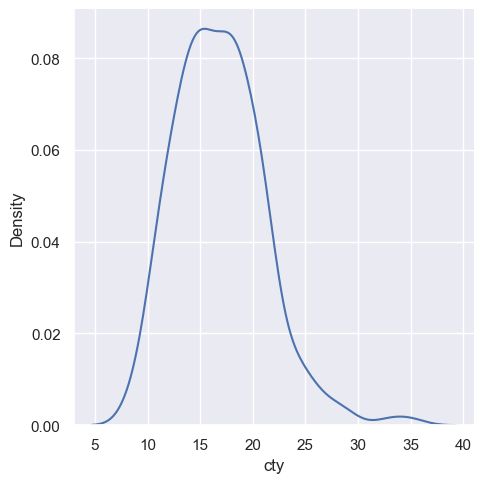

In [3]:
sns.displot(x="cty",kind="kde",data=mpg)

Distribution plots with two variables create heatmaps.

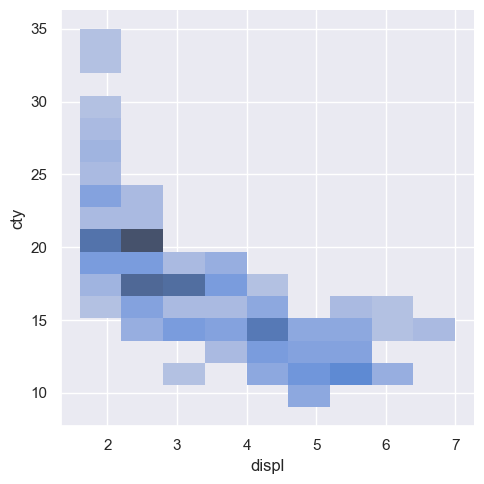

In [4]:
sns.displot(x="displ",y="cty",data=mpg)

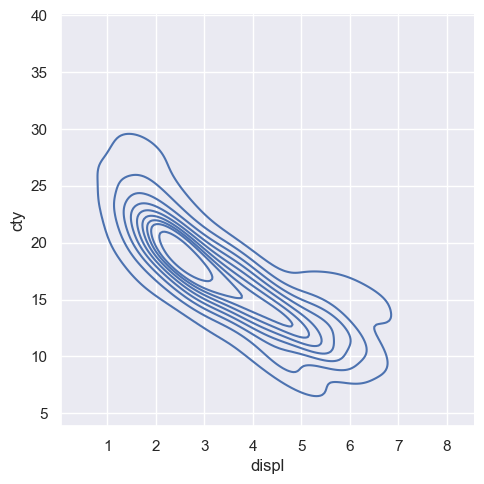

In [5]:
sns.displot(x="displ",y="cty",kind="kde",data=mpg)

## Adding labels

Before learning about other visualization types, it's important to know how to change axis labels and add a graph title. You can do this easily using the `.set()` method.

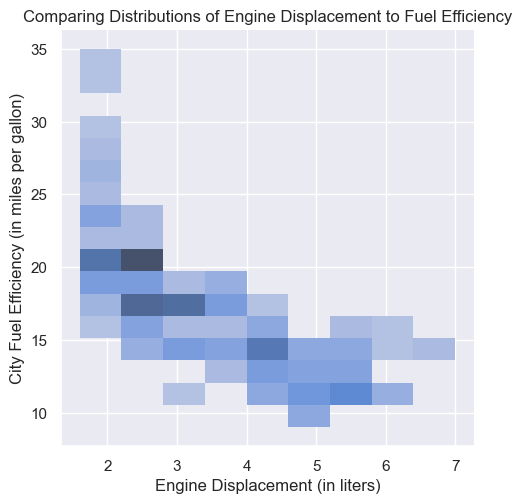

In [6]:
(sns.displot(x="displ",y="cty",data=mpg)
 .set(title="Comparing Distributions of Engine Displacement to Fuel Efficiency", 
      xlabel="Engine Displacement (in liters)",
      ylabel="City Fuel Efficiency (in miles per gallon)"))

## Category Plots

Categorical plots let you compare groups according to categorical variables. A standard category plot is the bar plot, which automatically compares means in Seaborn.

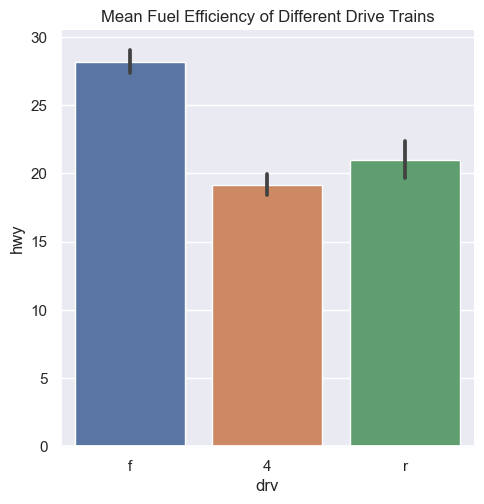

In [7]:
sns.catplot(x="drv",y="hwy",kind="bar",data=mpg).set(title="Mean Fuel Efficiency of Different Drive Trains")

You can similarly create a box plot to compare medians and distributions among groups instead.

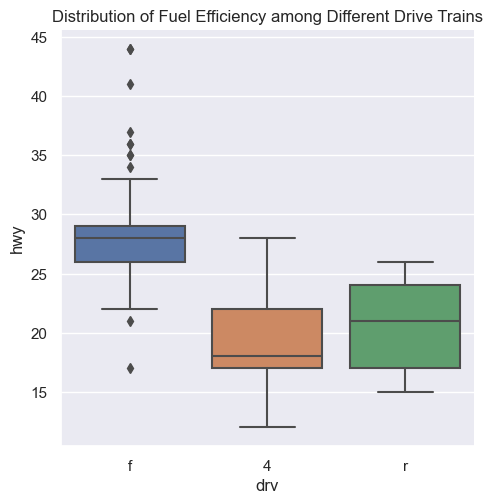

In [8]:
sns.catplot(x="drv",y="hwy",kind="box",data=mpg).set(title="Distribution of Fuel Efficiency among Different Drive Trains")

## Relationship Plots

To show a correlation or regression between two variables, Seaborn uses `relplot()`. The default is a simple scatterplot.

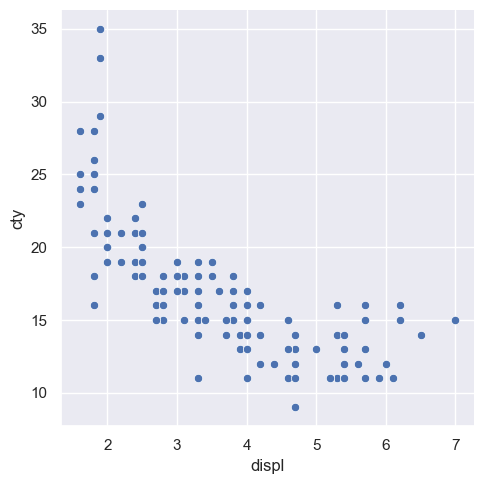

In [9]:
sns.relplot(x="displ",y="cty",data=mpg)

You can separate this by color with `hue`.

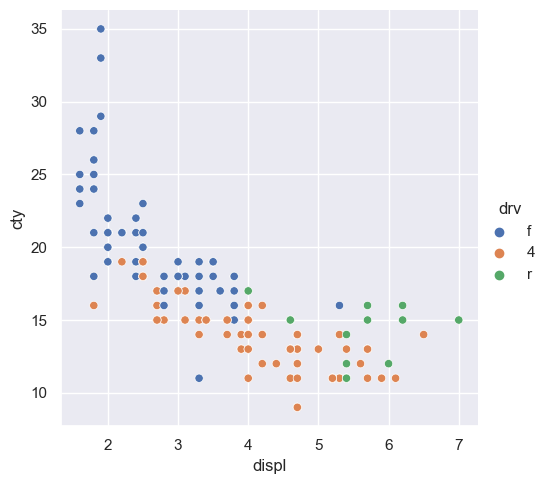

In [10]:
sns.relplot(x="displ",y="cty",hue="drv",data=mpg)

Line plots are also a kind of relationship plot. The function will automatically average values for you.

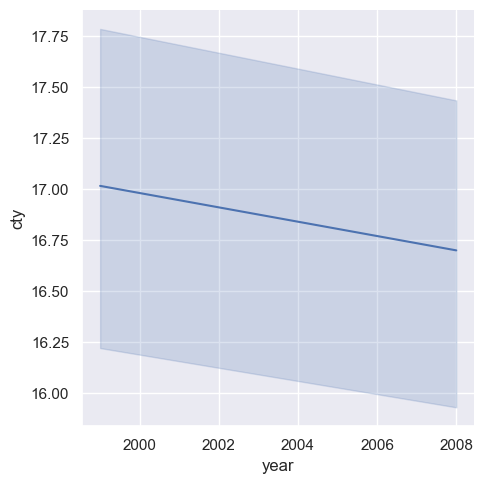

In [11]:
sns.relplot(x="year",y="cty",kind="line",data=mpg)

You can add a regression line to a scatter plot with the `lmplot()` function (which stands for "linear model").

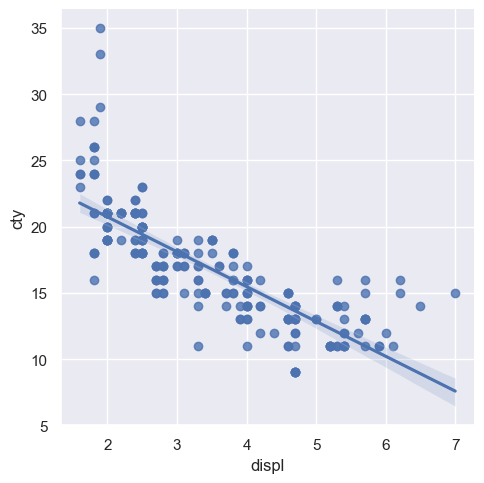

In [12]:
sns.lmplot(x="displ",y="cty",data=mpg)

And you can add distributions to the above regression plot with `jointplot()`.

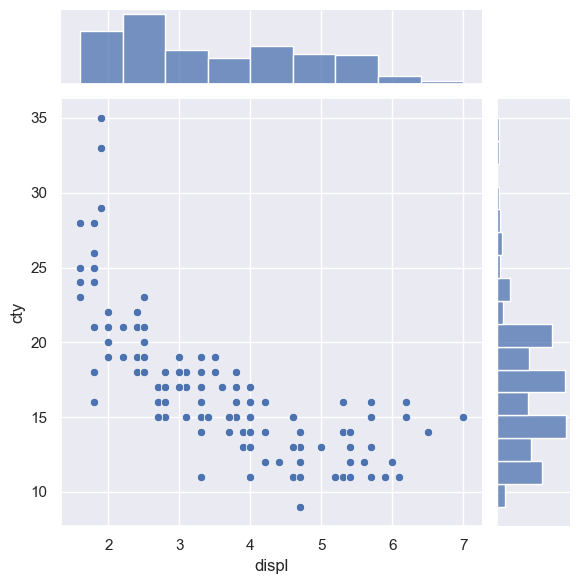

In [13]:
sns.jointplot(x="displ",y="cty",data=mpg)

## Faceting

It sometimes makes sense to split data into separate graphs by category. The easiest way to do this is with the `col` parameter.

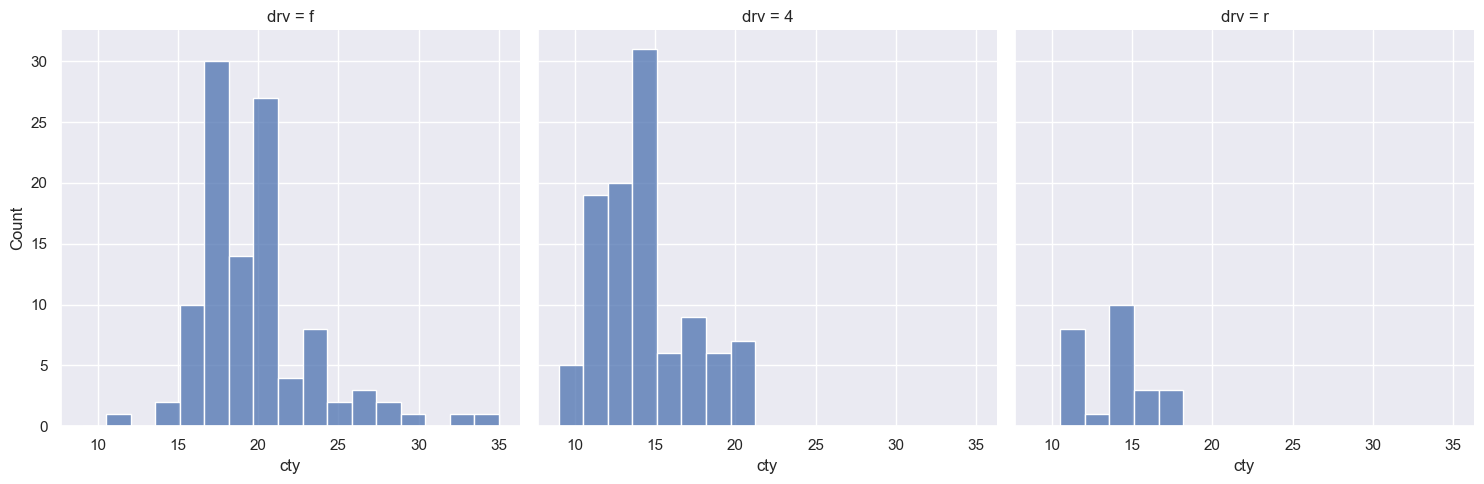

In [14]:
# Distribution of fuel efficency by drive train
sns.displot(x="cty",col="drv",data=mpg)